In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset
#### This dataset has been taken from kaggle-"Layoffs Dataset 2023", URL :https://www.kaggle.com/datasets/theakhilb/layoffs-data-2022

In [2]:
df=pd.read_csv('layoffs_data.csv')

In [3]:
df.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
0,Polygon,Bengaluru,Crypto,100.0,0.2,2023-02-21 00:00:00,https://inc42.com/buzz/polygon-lays-off-20-of-...,451.0,Unknown,2023-02-21 19:54:49,India,Unknown
1,Bolt,Lagos,Transportation,17.0,NaN,2023-02-21 00:00:00,https://techpoint.africa/2023/02/21/bolt-lays-...,NaN,Series F,2023-02-22 02:48:31,Nigeria,Unknown
2,Criteo,Paris,Marketing,NaN,NaN,2023-02-21 00:00:00,https://digiday.com/media-buying/criteo-adds-t...,61.0,Post-IPO,2023-02-21 19:10:52,France,Unknown
3,Green Labs,Seoul,Food,NaN,NaN,2023-02-21 00:00:00,https://techcrunch.com/2023/02/21/agtech-start...,214.0,Series C,2023-02-21 19:27:25,South Korea,Unknown
4,PeerStreet,Los Angeles,Real Estate,NaN,NaN,2023-02-21 00:00:00,https://www.bizjournals.com/triangle/inno/stor...,121.0,Series C,2023-02-22 02:50:37,United States,Unknown


In [4]:
df.shape

(2282, 12)

In [5]:
pd.set_option('display.max_columns',None)

In [6]:
df

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
0,Polygon,Bengaluru,Crypto,100.0,0.20,2023-02-21 00:00:00,https://inc42.com/buzz/polygon-lays-off-20-of-...,451.0,Unknown,2023-02-21 19:54:49,India,Unknown
1,Bolt,Lagos,Transportation,17.0,NaN,2023-02-21 00:00:00,https://techpoint.africa/2023/02/21/bolt-lays-...,NaN,Series F,2023-02-22 02:48:31,Nigeria,Unknown
2,Criteo,Paris,Marketing,NaN,NaN,2023-02-21 00:00:00,https://digiday.com/media-buying/criteo-adds-t...,61.0,Post-IPO,2023-02-21 19:10:52,France,Unknown
3,Green Labs,Seoul,Food,NaN,NaN,2023-02-21 00:00:00,https://techcrunch.com/2023/02/21/agtech-start...,214.0,Series C,2023-02-21 19:27:25,South Korea,Unknown
4,PeerStreet,Los Angeles,Real Estate,NaN,NaN,2023-02-21 00:00:00,https://www.bizjournals.com/triangle/inno/stor...,121.0,Series C,2023-02-22 02:50:37,United States,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
2277,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,2020-03-13 00:00:00,https://layoffs.fyi/2020/04/02/hopskipdrive-la...,45.0,Unknown,2020-04-03 04:47:03,United States,Unknown
2278,Panda Squad,SF Bay Area,Consumer,6.0,0.75,2020-03-13 00:00:00,https://twitter.com/danielsinger/status/123854...,1.0,Seed,2020-04-17 00:12:49,United States,Unknown
2279,Tamara Mellon,Los Angeles,Retail,20.0,0.40,2020-03-12 00:00:00,https://layoffs.fyi/list/tamara-mellon/,90.0,Series C,2020-03-31 16:04:23,United States,Unknown
2280,EasyPost,Salt Lake City,Logistics,75.0,NaN,2020-03-11 00:00:00,https://www.bizjournals.com/louisville/news/20...,12.0,Series A,2020-03-31 13:21:54,United States,Unknown


# Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2282 entries, 0 to 2281
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company                     2282 non-null   object 
 1   Location_HQ                 2282 non-null   object 
 2   Industry                    2282 non-null   object 
 3   Laid_Off_Count              1564 non-null   float64
 4   Percentage                  1533 non-null   float64
 5   Date                        2281 non-null   object 
 6   Source                      2282 non-null   object 
 7   Funds_Raised                2084 non-null   float64
 8   Stage                       2282 non-null   object 
 9   Date_Added                  2282 non-null   object 
 10  Country                     2282 non-null   object 
 11  List_of_Employees_Laid_Off  2281 non-null   object 
dtypes: float64(3), object(9)
memory usage: 214.1+ KB


In [8]:
df.duplicated().sum()

0

No Duplicate rows presents.

In [9]:
df.isnull().sum()

Company                         0
Location_HQ                     0
Industry                        0
Laid_Off_Count                718
Percentage                    749
Date                            1
Source                          0
Funds_Raised                  198
Stage                           0
Date_Added                      0
Country                         0
List_of_Employees_Laid_Off      1
dtype: int64

<AxesSubplot:>

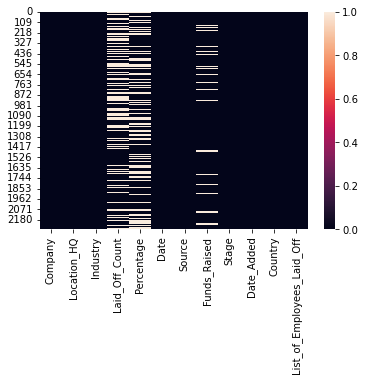

In [10]:
sns.heatmap(df.isnull())

In [11]:
#Deleting unnecessary columns
df.drop(columns=['Date_Added','Source','List_of_Employees_Laid_Off'],inplace=True)

In [12]:
df.shape

(2282, 9)

In [13]:
#Since each attribute with null values is numeric so filling null values with 0.
df.fillna(0,inplace=True)

In [14]:
#Correcting Columns name 
col=df.columns
for x in col:
    df.rename(columns=lambda x: x.strip().lower(),inplace=True)
        

In [15]:
df.columns

Index(['company', 'location_hq', 'industry', 'laid_off_count', 'percentage',
       'date', 'funds_raised', 'stage', 'country'],
      dtype='object')

In [16]:
df.rename(columns={'location_hq':'location'},inplace=True)

In [17]:
df['country'].unique()

array(['India', 'Nigeria', 'France', 'South Korea', 'United States',
       'Germany', 'Australia', 'Israel', 'China', 'Brazil', 'Italy',
       'Singapore', 'United Kingdom', 'Indonesia', 'Estonia', 'Canada',
       'Ireland', 'Finland', 'Netherlands', 'Spain', 'Portugal', 'Sweden',
       'Chile', 'Colombia', 'Argentina', 'Seychelles', 'Austria',
       'Mexico', 'Switzerland', 'Egypt', 'Kenya', 'Luxembourg', 'Greece',
       'Poland', 'Norway', 'Belgium', 'Denmark', 'Hong Kong',
       'New Zealand', 'Malaysia', 'Hungary', 'Vietnam', 'Thailand',
       'Lithuania', 'Ghana', 'Senegal', 'Pakistan',
       'United Arab Emirates', 'Peru', 'Bahrain', 'Romania', 'Turkey',
       'Russia', 'Uruguay', 'Bulgaria', 'South Africa', 'Czech Republic',
       'Myanmar'], dtype=object)

In [18]:
df['country'].nunique()

58

In [19]:
df['stage'].nunique()

16

In [20]:
df['stage'].unique()

array(['Unknown', 'Series F', 'Post-IPO', 'Series C', 'Series B',
       'Series E', 'Seed', 'Series A', 'Acquired', 'Series G', 'Series D',
       'Series H', 'Private Equity', 'Subsidiary', 'Series J', 'Series I'],
      dtype=object)

In [21]:
df['laid_off_count']=df['laid_off_count'].astype(int)


In [22]:
# creating month,day and year column to visualise the data clearly.
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day_name()
df['year'] = df['date'].dt.year

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2282 entries, 0 to 2281
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   company         2282 non-null   object        
 1   location        2282 non-null   object        
 2   industry        2282 non-null   object        
 3   laid_off_count  2282 non-null   int32         
 4   percentage      2282 non-null   float64       
 5   date            2282 non-null   datetime64[ns]
 6   funds_raised    2282 non-null   float64       
 7   stage           2282 non-null   object        
 8   country         2282 non-null   object        
 9   month           2282 non-null   int64         
 10  day             2282 non-null   object        
 11  year            2282 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(2), object(6)
memory usage: 205.1+ KB


In [24]:
df['year'].unique()

array([2023, 2022, 2021, 2020, 1970], dtype=int64)

In [25]:
#deleting the rows with 1970 as year 
df=df[df['year']!=1970]

In [26]:
df['year'].unique()

array([2023, 2022, 2021, 2020], dtype=int64)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2281 entries, 0 to 2280
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   company         2281 non-null   object        
 1   location        2281 non-null   object        
 2   industry        2281 non-null   object        
 3   laid_off_count  2281 non-null   int32         
 4   percentage      2281 non-null   float64       
 5   date            2281 non-null   datetime64[ns]
 6   funds_raised    2281 non-null   float64       
 7   stage           2281 non-null   object        
 8   country         2281 non-null   object        
 9   month           2281 non-null   int64         
 10  day             2281 non-null   object        
 11  year            2281 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(2), object(6)
memory usage: 222.8+ KB


# Exploratory Data Analysis

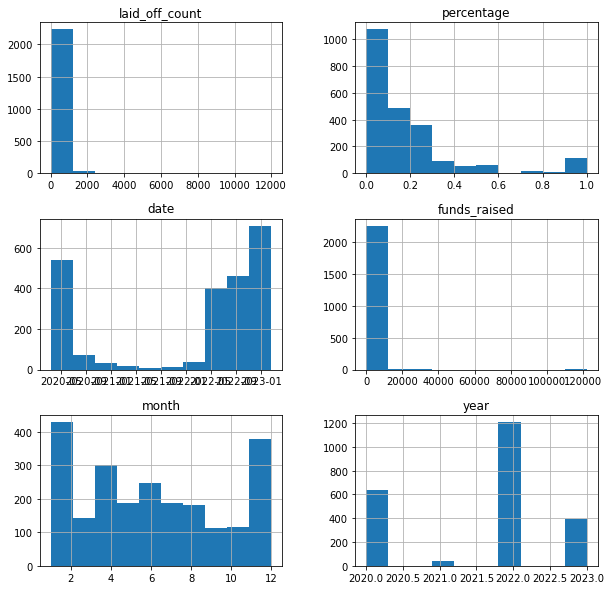

In [28]:
df.hist(figsize=(10,10));

In [29]:
#how many layoffs are done in each year 
df.groupby('year')['laid_off_count'].sum()

year
2020     80998
2021     15823
2022    160997
2023    108901
Name: laid_off_count, dtype: int32

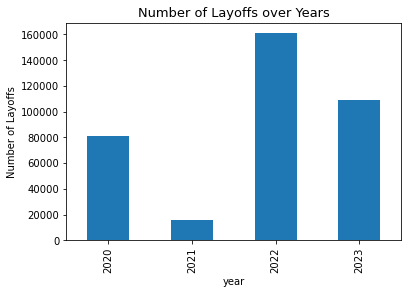

In [30]:
df.groupby('year')['laid_off_count'].sum().plot(kind='bar')
plt.ylabel('Number of Layoffs')
plt.title('Number of Layoffs over Years',size=13)
plt.show()

In 2020, almost 81k employees were laid off. In 2021, the situation has become better with 15k laid off but unfortunately in 2022, the situation got worse than in 2020 with over 160k laid off and till the date in 2023 over 109k layoffs has happened.

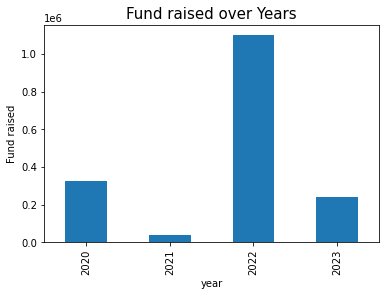

In [31]:
# fund raised in each year 
df.groupby('year')['funds_raised'].sum().plot(kind='bar')
plt.ylabel('Fund raised')
plt.title('Fund raised over Years',size=15)
plt.show()

In [32]:
# fund raised by countries
df.groupby('country')['funds_raised'].sum().sort_values(ascending=False)

country
United States           1.178898e+06
India                   1.563406e+05
China                   8.390200e+04
United Kingdom          5.296344e+04
Germany                 4.745798e+04
Netherlands             2.875700e+04
Singapore               2.549698e+04
Lithuania               2.470000e+04
Brazil                  2.060770e+04
Sweden                  1.817800e+04
Indonesia               1.417000e+04
Canada                  1.390030e+04
Israel                  1.007600e+04
Australia               4.338000e+03
Argentina               2.872000e+03
Nigeria                 2.168000e+03
Austria                 1.918000e+03
Turkey                  1.800000e+03
Ireland                 1.661000e+03
Spain                   1.554000e+03
Hong Kong               1.324000e+03
France                  1.183000e+03
United Arab Emirates    1.034000e+03
Malaysia                9.810000e+02
Norway                  9.740000e+02
Finland                 8.770000e+02
Mexico                  8.0700

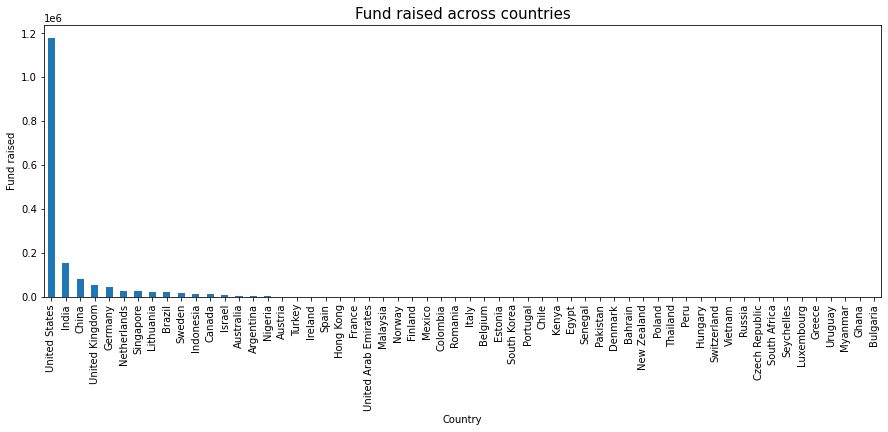

In [33]:
plt.figure(figsize=(15,5))
df.groupby('country')['funds_raised'].sum().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Fund raised')
plt.xlabel('Country')
plt.title('Fund raised across countries',size=15)
plt.show()

In [34]:
#Number of Layoffs across different countries
df.groupby('country')['laid_off_count'].sum().sort_values(ascending=False)

country
United States           251022
India                    35543
Netherlands              17220
Brazil                    9646
Germany                   8251
United Kingdom            6948
Canada                    6319
Singapore                 5995
China                     5905
Israel                    3598
Indonesia                 3521
Sweden                    2764
Australia                 1655
Nigeria                   1482
United Arab Emirates       995
Hong Kong                  730
Austria                    570
Russia                     400
Kenya                      349
Estonia                    333
Argentina                  323
France                     301
Senegal                    300
Mexico                     270
Ireland                    257
Spain                      250
Finland                    250
Denmark                    240
Myanmar                    200
Norway                     140
Colombia                   130
Bulgaria                   120


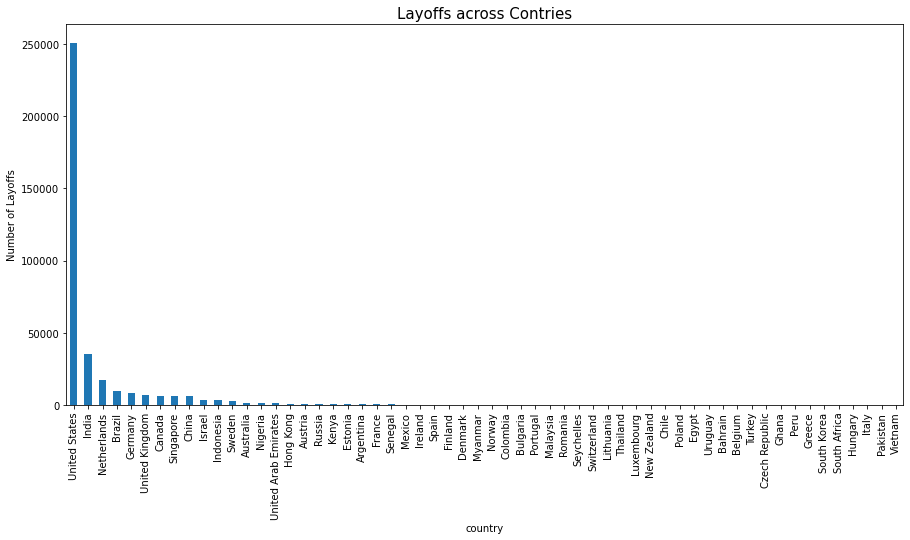

In [35]:
plt.figure(figsize=(15,7))
df.groupby('country')['laid_off_count'].sum().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Number of Layoffs')
plt.title('Layoffs across Contries',size=15)
plt.show()

In [36]:
#Proportion of layoffs across different countries to the total layoffs
round(df.groupby('country')['laid_off_count'].sum().sort_values(ascending=False)/df.laid_off_count.sum(),3)

country
United States           0.685
India                   0.097
Netherlands             0.047
Brazil                  0.026
Germany                 0.022
United Kingdom          0.019
Canada                  0.017
Singapore               0.016
China                   0.016
Israel                  0.010
Indonesia               0.010
Sweden                  0.008
Australia               0.005
Nigeria                 0.004
United Arab Emirates    0.003
Hong Kong               0.002
Austria                 0.002
Russia                  0.001
Kenya                   0.001
Estonia                 0.001
Argentina               0.001
France                  0.001
Senegal                 0.001
Mexico                  0.001
Ireland                 0.001
Spain                   0.001
Finland                 0.001
Denmark                 0.001
Myanmar                 0.001
Norway                  0.000
Colombia                0.000
Bulgaria                0.000
Portugal                0.000
Ma

Here we can see that the United States has the most layoff by far with (68.5%) of the total layoffs, followed by India with (9.7%).

In [37]:
#Layoffs within industries
df.groupby('industry')['laid_off_count'].sum().sort_values(ascending=False)

industry
Consumer          44573
Retail            43144
Transportation    33199
Finance           28200
Other             25575
Healthcare        25142
Food              22410
Real Estate       17125
Travel            17029
Hardware          13828
Sales             13146
Education         13139
Crypto            10693
Marketing          9945
Fitness            8718
Infrastructure     5745
Security           5709
Data               5060
Media              4462
Logistics          4026
Construction       3863
Support            3078
Recruiting         2775
HR                 2583
Product            1233
Legal               836
Energy              802
Aerospace           661
Manufacturing        20
Unknown               0
Name: laid_off_count, dtype: int32

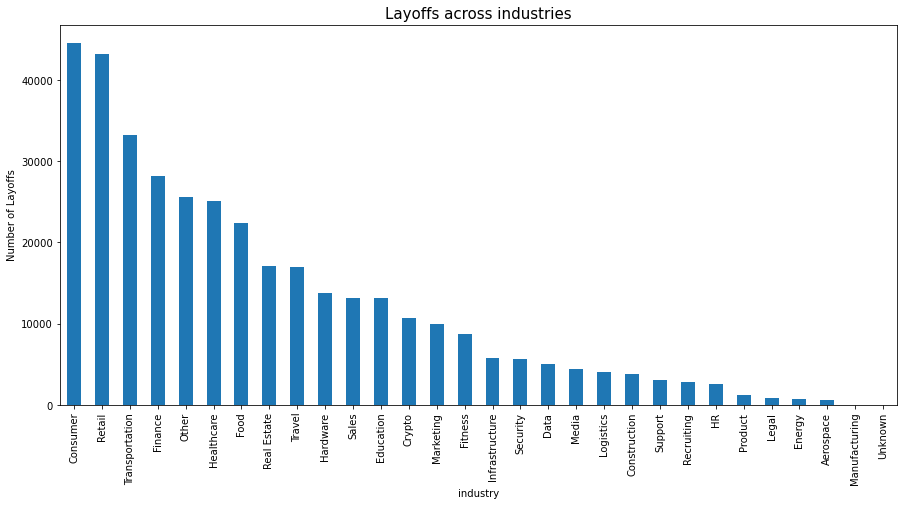

In [38]:
plt.figure(figsize=(15,7))
df.groupby('industry')['laid_off_count'].sum().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Number of Layoffs')
plt.title('Layoffs across industries',size=15)
plt.show()

If we look at the numbers of layoffs in each industry, we will find that consumer, retail have highest layoffs of about 40k and transportation have layoffs about 30k.
Food followed by real estate, travel, hardware and education have layoffs between 12k to 17k.

In [39]:
#finding average layoff for each industry
df.groupby('industry')['percentage'].mean().sort_values(ascending=False).round(3)

industry
Aerospace         0.377
Recruiting        0.242
Travel            0.234
Crypto            0.233
Product           0.217
Real Estate       0.214
Fitness           0.210
Education         0.203
Healthcare        0.201
Food              0.199
Construction      0.184
Retail            0.183
Finance           0.172
Infrastructure    0.171
Legal             0.162
Consumer          0.158
Transportation    0.157
Media             0.156
Other             0.154
Unknown           0.150
Marketing         0.143
HR                0.137
Logistics         0.137
Data              0.125
Energy            0.125
Support           0.118
Security          0.114
Hardware          0.091
Sales             0.066
Manufacturing     0.025
Name: percentage, dtype: float64

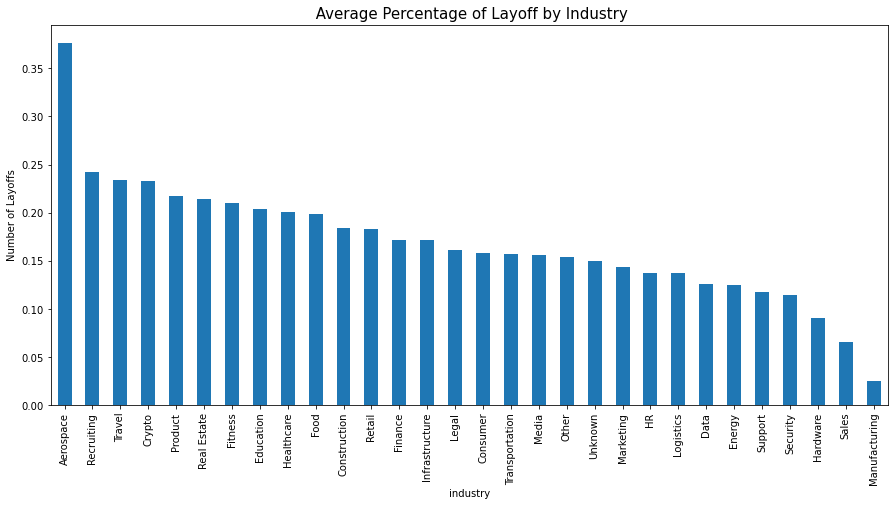

In [40]:
plt.figure(figsize=(15,7))
df.groupby('industry')['percentage'].mean().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Number of Layoffs')
plt.title(' Average Percentage of Layoff by Industry',size=15)
plt.show()

If we look at the average percentage of layoffs in every industry, we can see that Aerospace has the most average percentage of layoffs (37.7%), followed by Recruiting (25.5%).
Manufacturing has the least layoff percentage (2.5%).
If we looked from the employee side, Transportation followed by consumer, retail, and finance were the most affected industries by covid-19. Legal followed by aerospace, product, and energy were the least affected industries by covid-19.
But if we looked from the Industries owner's side, Aerospace followed by Product, were the most affected industries by covid-19. And Sales was the least affected industry by covid-19.

In [41]:
#finding layoff by stage
df.groupby('stage')['laid_off_count'].sum().sort_values(ascending=False)

stage
Post-IPO          192274
Unknown            39814
Acquired           26779
Series C           19182
Series D           19001
Series B           14852
Series E           12118
Series F            9932
Private Equity      7957
Series H            7244
Series A            5648
Series G            3627
Series J            3570
Series I            2855
Seed                1636
Subsidiary           230
Name: laid_off_count, dtype: int32

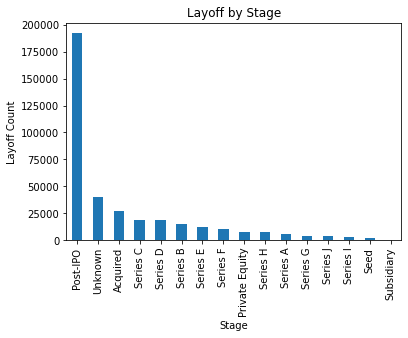

In [47]:
#find layoff by stage
df.groupby('stage')['laid_off_count'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Layoff by Stage')
plt.xlabel('Stage')
plt.ylabel('Layoff Count');

In [49]:
#calculate the proportion of layoff in various stage to the total layoff.
proportion_of_Seed_layoff = round(df.groupby('stage')['laid_off_count'].sum().sort_values(ascending=False)/df.laid_off_count.sum(),3)
proportion_of_Seed_layoff

stage
Post-IPO          0.524
Unknown           0.109
Acquired          0.073
Series C          0.052
Series D          0.052
Series B          0.040
Series E          0.033
Series F          0.027
Private Equity    0.022
Series H          0.020
Series A          0.015
Series G          0.010
Series J          0.010
Series I          0.008
Seed              0.004
Subsidiary        0.001
Name: laid_off_count, dtype: float64

IPO stage companies have the most layoffs with (52.4%).
Subsidiary stage companies have the least layoffs with (0.1%).

In [50]:
#layoff by month for year 2020
df20 = df.query('year == 2020')
df1 = df20.groupby('month')['laid_off_count'].sum().to_frame()
df1.rename(columns={'laid_off_count':'layoff_2020'},inplace=True)
df1

,layoff_2020
month,
3,9628
4,26710
5,25804
6,7627
7,7112
8,1969
9,609
10,450
11,237


In [59]:
df21 = df.query('year == 2021')
df2 = df21.groupby('month')['laid_off_count'].sum().to_frame()
df2.rename(columns={'laid_off_count':'layoff_2021'},inplace=True)
df2
    

,layoff_2021
month,
1,6813
2,868
3,47
4,261
5,0
6,2434
7,80
8,1867
9,161


In [60]:
df22 = df.query('year == 2022')
df3 = df22.groupby('month')['laid_off_count'].sum().to_frame()
df3.rename(columns={'laid_off_count':'layoff_2022'},inplace=True)
df3

,layoff_2022
month,
1,510
2,3685
3,5714
4,4064
5,12535
6,18144
7,16223
8,13055
9,5881


In [61]:
df23 = df.query('year == 2023')
df4 = df23.groupby('month')['laid_off_count'].sum().to_frame()
df4.rename(columns={'laid_off_count':'layoff_2023'},inplace=True)
df4

,layoff_2023
month,
1,84414
2,24487


In [62]:
df_comb= pd.concat([df4,df3,df2,df1], axis=1)
df_comb

,layoff_2023,layoff_2022,layoff_2021,layoff_2020
month,,,,
1,84414.0,510,6813,NaN
2,24487.0,3685,868,NaN
3,NaN,5714,47,9628.0
4,NaN,4064,261,26710.0
5,NaN,12535,0,25804.0
6,NaN,18144,2434,7627.0
7,NaN,16223,80,7112.0
8,NaN,13055,1867,1969.0
9,NaN,5881,161,609.0


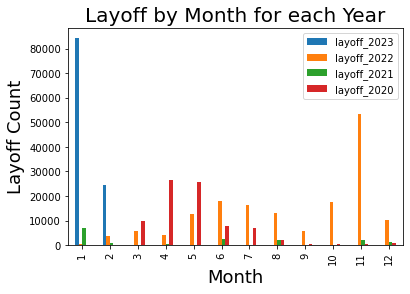

In [63]:
df_comb.plot(kind='bar')
plt.title('Layoff by Month for each Year',size=20)
plt.xlabel('Month',size=18)
plt.ylabel('Layoff Count',size=18);

In 2020, starting from March when the covid-19 hit the world, the most layoff month was April with 26k layoff, followed by May then started to decrease.
In 2021, January has the most layoffs of about 6k but the condition was better than previous year.
In 2022 also has the worst layoff of about 53k.
In 2023, January had extensive Layoffs of about 84k.

In [64]:
#top 10 funds raised companies
df.groupby('company')['funds_raised'].sum().nlargest(10)

company
Netflix          487600.0
Uber             123500.0
WeWork            43500.0
WeWork            41700.0
Twitter           31500.0
Delivery Hero     26500.0
Bytedance         26200.0
Meta              26000.0
Tencent           25200.0
Rivian            24500.0
Name: funds_raised, dtype: float64

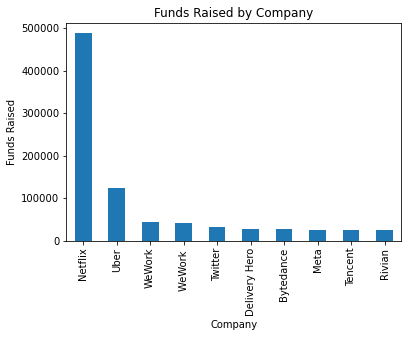

In [67]:
df.groupby('company')['funds_raised'].sum().nlargest(10).plot(kind='bar')
plt.title('Funds Raised by Company')
plt.xlabel('Company')
plt.ylabel('Funds Raised');

In [68]:
#10 largest layoff dates
ind = df['laid_off_count'].nlargest(10).index
df.loc[ind]

,company,location,industry,laid_off_count,percentage,date,funds_raised,stage,country,month,day,year
211,Google,SF Bay Area,Consumer,12000,0.06,2023-01-20,26.0,Post-IPO,United States,1,Friday,2023
677,Meta,SF Bay Area,Consumer,11000,0.13,2022-11-09,26000.0,Post-IPO,United States,11,Wednesday,2022
243,Microsoft,Seattle,Other,10000,0.05,2023-01-18,1.0,Post-IPO,United States,1,Wednesday,2023
609,Amazon,Seattle,Retail,10000,0.03,2022-11-16,108.0,Post-IPO,United States,11,Wednesday,2022
382,Amazon,Seattle,Retail,8000,0.02,2023-01-04,108.0,Post-IPO,United States,1,Wednesday,2023
383,Salesforce,SF Bay Area,Sales,8000,0.10,2023-01-04,65.0,Post-IPO,United States,1,Wednesday,2023
79,Dell,Austin,Hardware,6650,0.05,2023-02-06,0.0,Post-IPO,United States,2,Monday,2023
140,Philips,Amsterdam,Healthcare,6000,0.13,2023-01-30,0.0,Post-IPO,Netherlands,1,Monday,2023
1705,Booking.com,Amsterdam,Travel,4375,0.25,2020-07-30,0.0,Acquired,Netherlands,7,Thursday,2020
610,Cisco,SF Bay Area,Infrastructure,4100,0.05,2022-11-16,2.0,Post-IPO,United States,11,Wednesday,2022


In [69]:
#layoff by company
df.groupby('company')['laid_off_count'].sum().nlargest(10)

company
Amazon         18150
Google         12000
Meta           11000
Salesforce     10090
Microsoft      10000
Philips        10000
Uber            7585
Dell            6650
Booking.com     4601
Cisco           4100
Name: laid_off_count, dtype: int32

Amazon the most layoff company with 18k layoffs, followed by Google with 12k layoffs.


In [70]:
#filter the data frame to get the number of the companies that went bankrupt
df_bankrupt = df.query('percentage == 1')
df_bankrupt

,company,location,industry,laid_off_count,percentage,date,funds_raised,stage,country,month,day,year
9,Fipola,Chennai,Food,0,1.0,2023-02-20,9.0,Series A,United States,2,Monday,2023
61,WeTrade,Bengaluru,Crypto,0,1.0,2023-02-09,0.0,Unknown,India,2,Thursday,2023
70,Medly,New York City,Healthcare,0,1.0,2023-02-08,100.0,Series C,United States,2,Wednesday,2023
76,Openpay,Melbourne,Finance,83,1.0,2023-02-07,299.0,Post-IPO,Australia,2,Tuesday,2023
172,Mode Global,London,Finance,0,1.0,2023-01-26,0.0,Post-IPO,United Kingdom,1,Thursday,2023
...,...,...,...,...,...,...,...,...,...,...,...,...
2264,Service,Los Angeles,Travel,0,1.0,2020-03-20,5.0,Seed,United States,3,Friday,2020
2267,Ejento,SF Bay Area,Recruiting,84,1.0,2020-03-19,0.0,Unknown,United States,3,Thursday,2020
2271,Popin,New York City,Fitness,0,1.0,2020-03-19,13.0,Unknown,United States,3,Thursday,2020
2275,Help.com,Austin,Support,16,1.0,2020-03-16,6.0,Seed,United States,3,Monday,2020


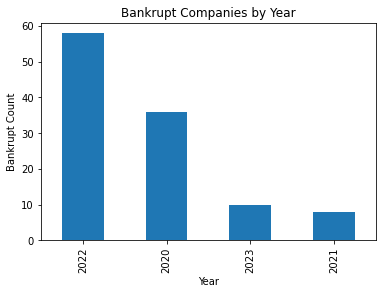

In [71]:
#plotting it with bar chart
df_bankrupt.year.value_counts().plot(kind='bar')
plt.title('Bankrupt Companies by Year')
plt.xlabel('Year')
plt.ylabel('Bankrupt Count');

In [72]:
#bankrupt companies by country
df_bankrupt.country.value_counts()

United States           70
India                    8
Australia                8
United Kingdom           5
Israel                   3
Singapore                3
Indonesia                3
Canada                   2
Germany                  2
Vietnam                  2
United Arab Emirates     2
Denmark                  1
Pakistan                 1
Kenya                    1
Brazil                   1
Name: country, dtype: int64

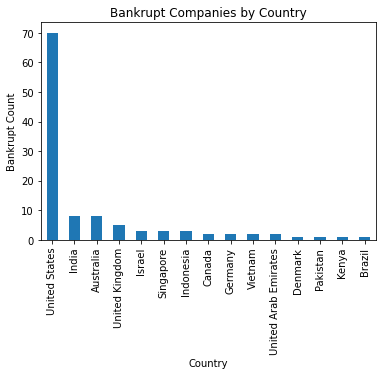

In [73]:
#plotting it with bar chart
df_bankrupt.country.value_counts().plot(kind='bar')
plt.title('Bankrupt Companies by Country')
plt.xlabel('Country')
plt.ylabel('Bankrupt Count');


In [76]:
#create a data frame with only Indian companies
df_India = df.query('country == "India"')

In [77]:
#largest 10 location 
df_India.groupby('location')['laid_off_count'].sum().nlargest(10)

location
Bengaluru    21487
Mumbai        5795
Gurugram      5376
New Delhi     1910
Ahmedabad      500
Noida          250
Chennai        150
Indore          75
Hyderabad        0
Patna            0
Name: laid_off_count, dtype: int32

In India, Bengaluru has the most layoffs followed by Mumbai and Gurugram.

In [78]:
#create a data frame with only Indian companies
df_US = df.query('country == "United States"')

In [80]:
#largest 10 location 
df_US.groupby('location')['laid_off_count'].sum().nlargest(10)

location
SF Bay Area      122598
Seattle           34673
New York City     28789
Boston            10785
Austin             8980
Los Angeles        6375
Chicago            5789
Phoenix            5067
Philadelphia       2989
Miami              2391
Name: laid_off_count, dtype: int32

We know that the largest layoffs were in the United States but SF Bay Area by far has the largest layoffs with, followed by Seattle and New York City.